## 0. Importando Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime
import itertools
from itertools import permutations
import os
import ast

## 1. Definindo cenários

### 1.1. Define 3 matrizes para problema

#### Matriz Extra Simples

In [2]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

#### Matriz Simples

In [3]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

#### Matriz Média

In [4]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.9, 0.9]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.9, 0.9]

matrix_medium = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8])

#### Matriz Complexa

In [5]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

### 1.2. Plota Matrizes

#### Plota Matriz Extra Simples

<Axes: >

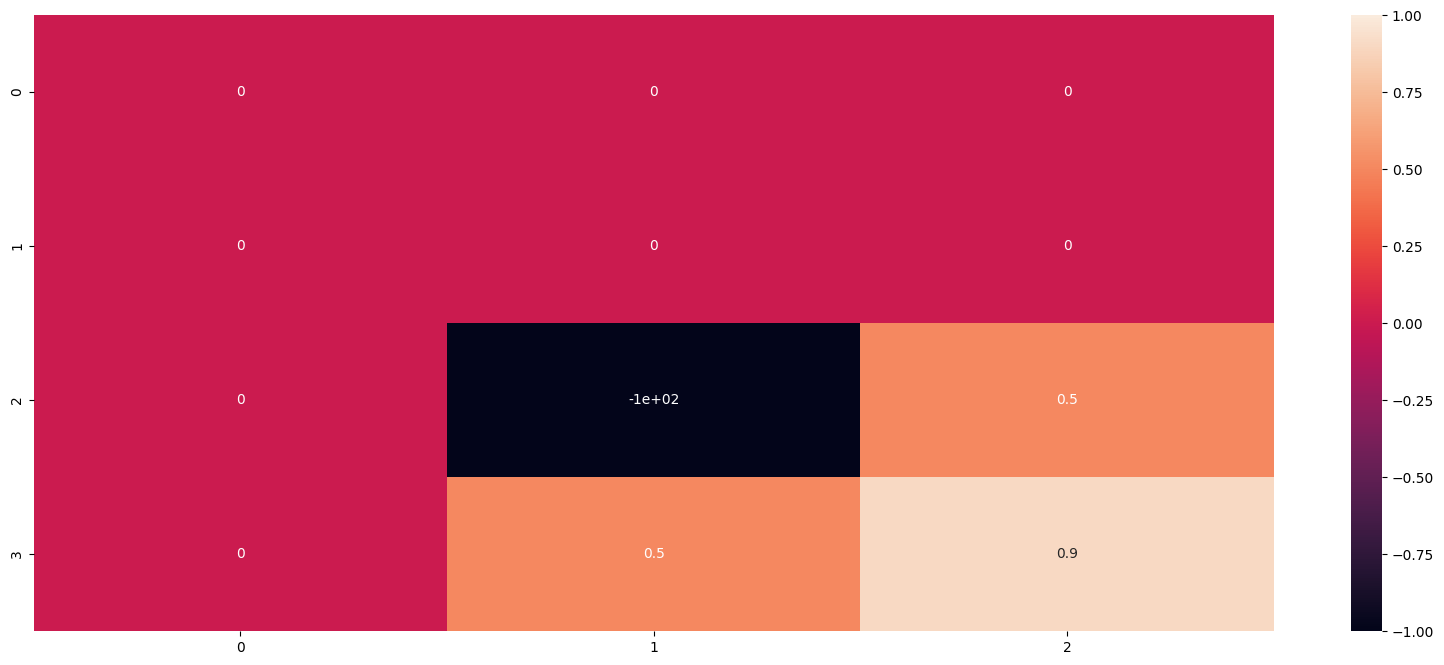

In [6]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_extra_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Simples

<Axes: >

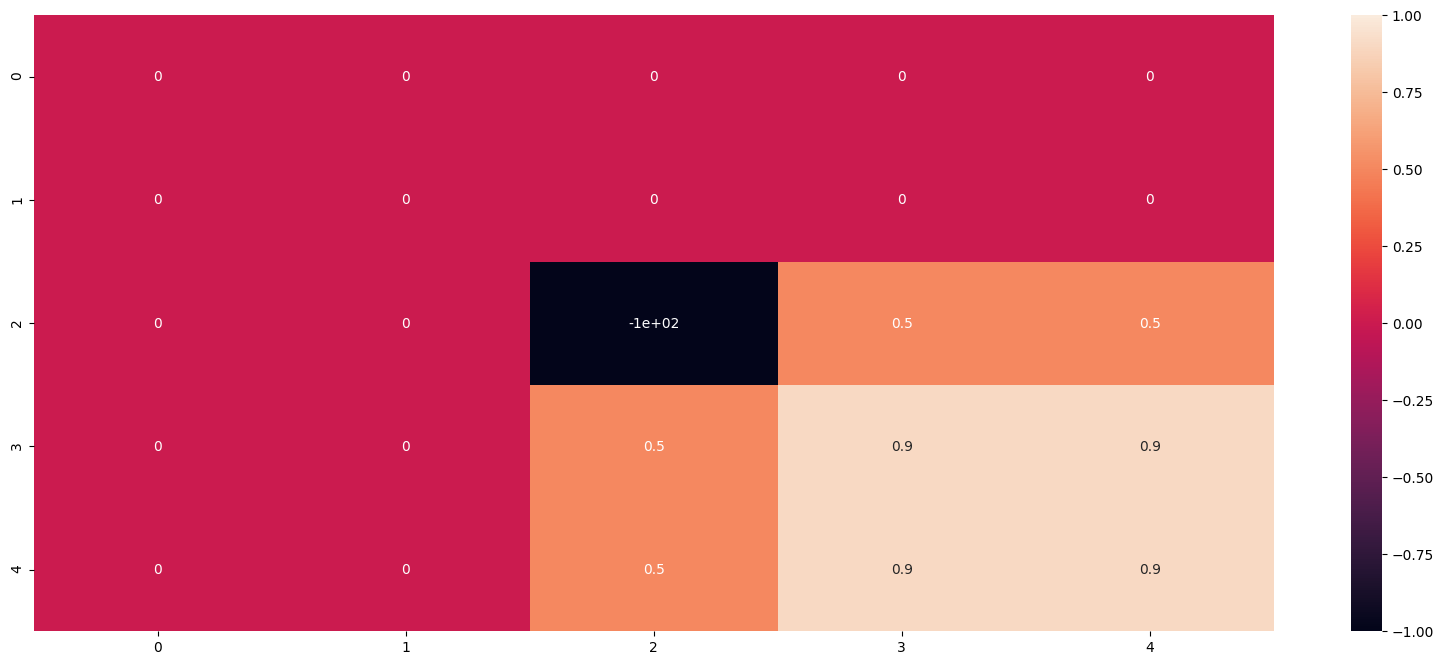

In [7]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Média

<Axes: >

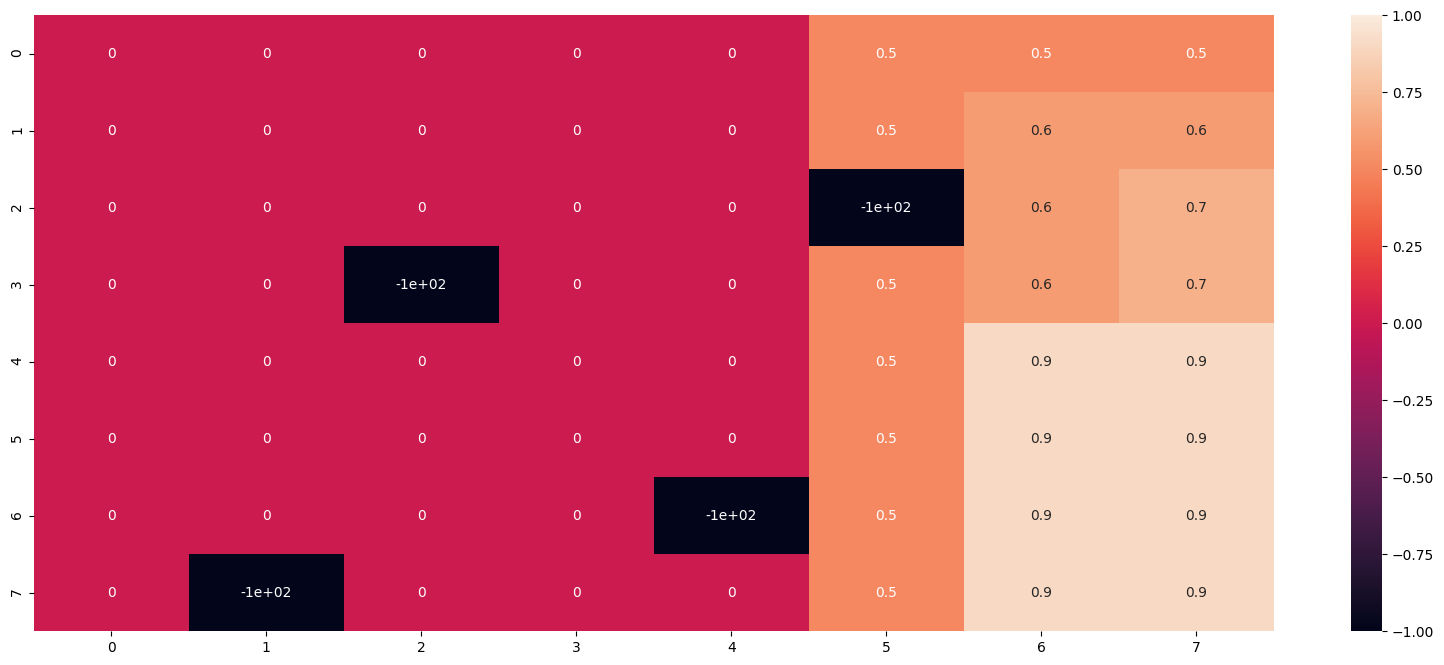

In [8]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_medium, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Complexa

<Axes: >

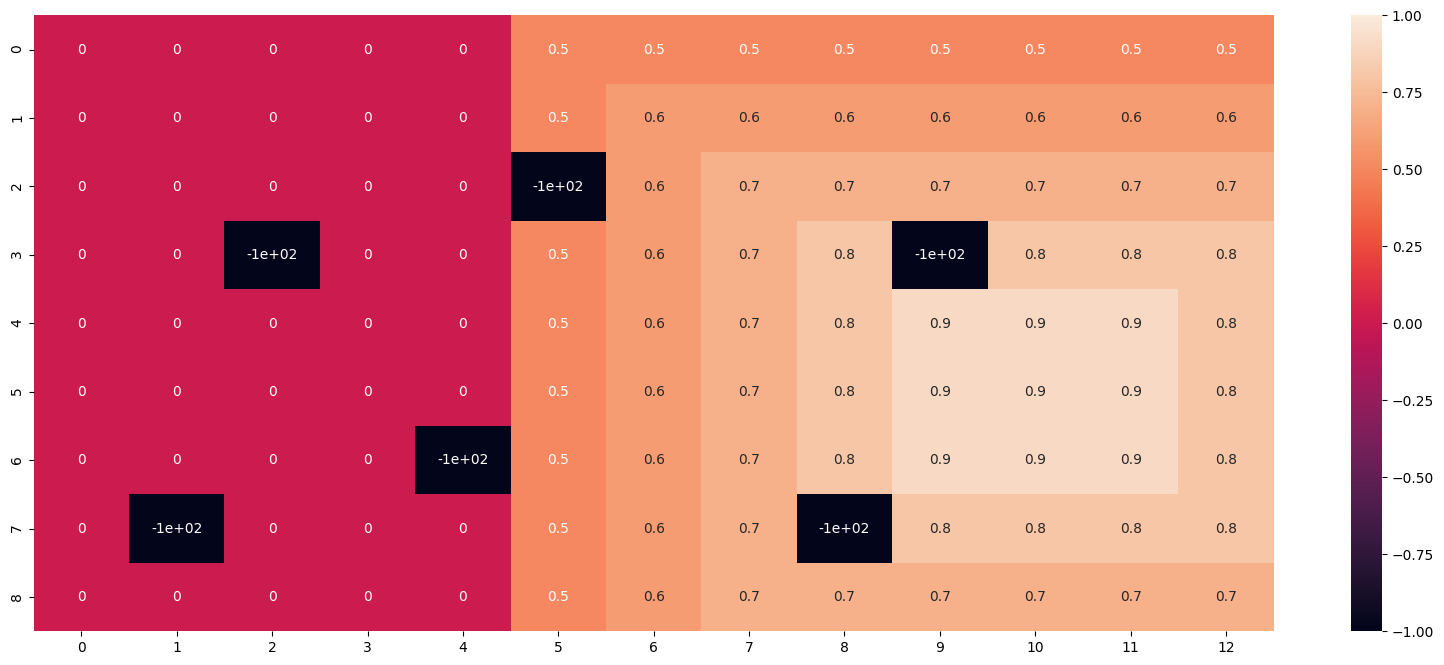

In [9]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_complex, vmin=-1, vmax=1, annot=True)

## 2. Importando Arquivos com Resultado

#### 2.1. Extrai informação dos resultados obtidos

In [10]:
# Set the directory path to your folder of XLSX files
folder_path = "Resultado_RL_Q_Learning"

# Create an empty dictionary to store the DataFrames
dfs_results = {}

# Loop through all files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".xlsx"):
        # Extract the name of the file without the extension
        name = os.path.splitext(filename)[0]
        # Read the XLSX file into a DataFrame and store it in the dictionary
        dfs_results[name] = pd.read_excel(os.path.join(folder_path, filename), sheet_name='results', index=False)

# Print the dictionary of DataFrames
[print(key) for key in dfs_results.keys()]

results_q_learn_dim_1x3_2023-05-05_07-53-07
results_q_learn_dim_1x3_2023-05-05_07-53-10
results_q_learn_dim_1x3_2023-05-05_07-53-14
results_q_learn_dim_1x3_2023-05-05_07-53-17
results_q_learn_dim_1x3_2023-05-05_07-53-20
results_q_learn_dim_1x3_2023-05-05_07-53-23
results_q_learn_dim_4x3_2023-05-05_07-38-03
results_q_learn_dim_4x3_2023-05-05_07-56-49
results_q_learn_dim_4x3_2023-05-05_08-00-48
results_q_learn_dim_4x3_2023-05-15_12-38-12
results_q_learn_dim_4x3_2023-05-15_13-17-54
results_q_learn_dim_4x3_2023-05-15_13-39-33
results_q_learn_dim_4x3_2023-05-15_14-14-08
results_q_learn_dim_4x3_2023-05-15_15-07-03
results_q_learn_dim_4x3_2023-05-15_16-02-18
results_q_learn_dim_4x3_2023-05-15_17-26-22
results_q_learn_dim_4x3_2023-05-15_18-22-06
results_q_learn_dim_4x3_2023-05-15_19-10-02
results_q_learn_dim_4x3_2023-05-15_20-29-14
results_q_learn_dim_4x3_2023-05-15_21-22-20
results_q_learn_dim_4x3_2023-05-15_22-32-25
results_q_learn_dim_4x3_2023-05-15_23-42-12
results_q_learn_dim_4x3_2023-05-

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### 2.2. Extrai informação dos parametros utilizados

In [11]:
# Set the directory path to your folder of XLSX files
folder_path = "Resultado_RL_Q_Learning"

# Create an empty dictionary to store the DataFrames
dfs_parameters = {}

# Loop through all files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".xlsx"):
        # Extract the name of the file without the extension
        name = os.path.splitext(filename)[0]
        # Read the XLSX file into a DataFrame and store it in the dictionary
        dfs_parameters[name] = pd.read_excel(os.path.join(folder_path, filename), sheet_name='parameters', index=False)

# Print the dictionary of DataFrames
[print(key) for key in dfs_parameters.keys()]

results_q_learn_dim_1x3_2023-05-05_07-53-07
results_q_learn_dim_1x3_2023-05-05_07-53-10
results_q_learn_dim_1x3_2023-05-05_07-53-14
results_q_learn_dim_1x3_2023-05-05_07-53-17
results_q_learn_dim_1x3_2023-05-05_07-53-20
results_q_learn_dim_1x3_2023-05-05_07-53-23
results_q_learn_dim_4x3_2023-05-05_07-38-03
results_q_learn_dim_4x3_2023-05-05_07-56-49
results_q_learn_dim_4x3_2023-05-05_08-00-48
results_q_learn_dim_4x3_2023-05-15_12-38-12
results_q_learn_dim_4x3_2023-05-15_13-17-54
results_q_learn_dim_4x3_2023-05-15_13-39-33
results_q_learn_dim_4x3_2023-05-15_14-14-08
results_q_learn_dim_4x3_2023-05-15_15-07-03
results_q_learn_dim_4x3_2023-05-15_16-02-18
results_q_learn_dim_4x3_2023-05-15_17-26-22
results_q_learn_dim_4x3_2023-05-15_18-22-06
results_q_learn_dim_4x3_2023-05-15_19-10-02
results_q_learn_dim_4x3_2023-05-15_20-29-14
results_q_learn_dim_4x3_2023-05-15_21-22-20
results_q_learn_dim_4x3_2023-05-15_22-32-25
results_q_learn_dim_4x3_2023-05-15_23-42-12
results_q_learn_dim_4x3_2023-05-

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### 3. Analisando Resultados

#### 3.1. Cria tabela com melhores e últimos resultados para cada configuração e cada modelo

In [12]:
# Cria listas vazias
best_results_matrix_simple_filename = []
best_results_matrix_simple_max_reward = []
best_results_matrix_simple_last_reward = []
best_results_matrix_simple_max_reward_time = []
best_results_matrix_simple_last_reward_time = []
best_results_matrix_simple_max_reward = []
best_results_matrix_simple_lr = []
best_results_matrix_simple_gamma = []
best_results_matrix_simple_d_f = []
best_results_matrix_simple_exp_rate = []
best_results_matrix_simple_max_exp_rate = []
best_results_matrix_simple_min_exp_rate = []
best_results_matrix_simple_decay_rate = []
best_results_matrix_simple_rounds = []
best_results_matrix_simple_max_time_steps = []
best_results_matrix_simple_last_time_steps = []
best_results_matrix_simple_steps = []
i=0

for key in dfs_results.keys():
    
    df_param_temp = dfs_parameters[list(dfs_results.keys())[i]]
    df_results_temp = dfs_results[list(dfs_results.keys())[i]]

    # Apenda Nome do arquivo
    best_results_matrix_simple_filename.append(key)

    # Apenda Melhor resultado de recompensa acumulada
    best_results_matrix_simple_max_reward.append(max(df_results_temp['TOTAL REWARDS']))

    # Apenda Resultado de recompensa acumulada após treinamento
    best_results_matrix_simple_last_reward.append(df_results_temp['TOTAL REWARDS'].iloc[-1])

    # Tempo referente ao melhor resultado
    best_results_matrix_simple_max_reward_time.append(min(df_results_temp.loc[df_results_temp['TOTAL REWARDS'] == max(df_results_temp['TOTAL REWARDS'])]['TIME']))

    # Último tempo obtido após treinamento
    best_results_matrix_simple_last_reward_time.append(df_results_temp['TIME'].iloc[-1])

    # TIMESTEPS referente ao melhor resultado
    best_results_matrix_simple_max_time_steps.append(min(df_results_temp.loc[df_results_temp['TOTAL REWARDS'] == max(df_results_temp['TOTAL REWARDS'])]['TIMESTEPS']))

    # Último TIMESTEPS obtido após treinamento
    best_results_matrix_simple_last_time_steps.append(df_results_temp['TIMESTEPS'].iloc[-1])

    # Apenda learning rate
    best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))

    # Apenda gamma
    best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))

    # Apenda d_f
    best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))

    # Apenda exp_rate
    best_results_matrix_simple_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='exp_rate']['parameter']))

    # Apenda max_exp_rate
    best_results_matrix_simple_max_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='max_exp_rate']['parameter']))

    # Apenda min_exp_rate
    best_results_matrix_simple_min_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='min_exp_rate']['parameter']))

    # Apenda decay_rate
    best_results_matrix_simple_decay_rate.append(float(df_param_temp[df_param_temp['parameter name']=='decay_rate']['parameter']))

    # Apenda rounds
    best_results_matrix_simple_rounds.append(float(df_param_temp[df_param_temp['parameter name']=='rounds']['parameter']))

    # Apenda steps
    best_results_matrix_simple_steps.append(float(df_param_temp[df_param_temp['parameter name']=='steps']['parameter']))

    i+=1

# Cria dataframe com principais indicadores e parametros
df_final_results = pd.DataFrame({'FILE NAME' : best_results_matrix_simple_filename,
                                 'MAX REWARD' : best_results_matrix_simple_max_reward,
                                 'LAST REWARD' : best_results_matrix_simple_last_reward,
                                 'MAX REWARD TIME' : best_results_matrix_simple_max_reward_time,
                                 'LAST REWARD TIME' : best_results_matrix_simple_last_reward_time,
                                 'MAX REWARD TIMESTEPS' : best_results_matrix_simple_max_time_steps,
                                 'LAST REWARD TIMESTEPS' : best_results_matrix_simple_last_time_steps,
                                 'lr' : best_results_matrix_simple_lr,
                                 'gamma' : best_results_matrix_simple_gamma,
                                 'd_f' : best_results_matrix_simple_d_f,
                                 'exp_rate' : best_results_matrix_simple_exp_rate,
                                 'max_exp_rate' : best_results_matrix_simple_max_exp_rate,
                                 'min_exp_rate' : best_results_matrix_simple_min_exp_rate,
                                 'decay_rate' : best_results_matrix_simple_decay_rate,
                                 'rounds' : best_results_matrix_simple_rounds,
                                 'steps' : best_results_matrix_simple_steps})


In [13]:
df_final_results

,FILE NAME,MAX REWARD,LAST REWARD,MAX REWARD TIME,LAST REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_1x3_2023-05-05_07-53-07,0.000000,0.000000,0.002998,0.014998,2,2,0.6,0.70,0.80,0.117757,0.3,0.01,0.01,100.0,2.0
1,results_q_learn_dim_1x3_2023-05-05_07-53-10,0.000000,0.000000,0.002991,0.024001,2,2,0.6,0.70,0.80,0.117757,0.3,0.01,0.01,100.0,2.0
2,results_q_learn_dim_1x3_2023-05-05_07-53-14,0.000000,0.000000,0.002999,0.022998,2,2,0.6,0.70,0.80,0.117757,0.3,0.01,0.01,100.0,2.0
3,results_q_learn_dim_1x3_2023-05-05_07-53-17,0.000000,0.000000,0.002998,0.026000,2,2,0.6,0.70,0.80,0.117757,0.3,0.01,0.01,100.0,2.0
4,results_q_learn_dim_1x3_2023-05-05_07-53-20,0.000000,0.000000,0.003000,0.013998,2,2,0.6,0.70,0.80,0.117757,0.3,0.01,0.01,100.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,results_q_learn_dim_9x13_2023-05-03_08-30-02,4.042473,0.943199,105.109862,103.649143,5000,5000,0.9,0.95,0.95,0.010000,1.0,0.01,0.05,500.0,5000.0
124,results_q_learn_dim_9x13_2023-05-04_10-06-18,3.662148,0.047613,23.226543,43.607034,1523,2710,0.9,0.70,0.95,0.010576,1.0,0.01,0.05,150.0,2710.0
125,results_q_learn_dim_9x13_2023-05-04_23-15-26,3.198636,0.603166,17.251557,79.813495,2855,5000,0.9,0.70,0.95,0.010576,1.0,0.01,0.05,150.0,5000.0
126,results_q_learn_dim_9x13_2023-05-05_08-04-52,1.645974,1.279086,6.111000,13.921117,902,1605,0.9,0.90,0.95,0.820543,1.0,0.01,0.05,5.0,1605.0


#### 3.2. Funções para filtrar tabelas e plotagem de gráficos

In [14]:
# Filtra dataframe de acordo com a dimensão da matriz estudada

def filter_df(df, matrix_dim):
    df_final_results_filtered = df[df['FILE NAME'].isin(list(filter(lambda k: matrix_dim in k, df['FILE NAME'])))]
    return df_final_results_filtered

In [15]:
# Função que recebe lista com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward)

def plot_episodes(dfs_names_list, variable):
    # Seleciona apenas dfs da lista
    dfs_searched=[]
    for df_names in dfs_names_list:
        dfs_searched.append(dfs_results[df_names])

    # Concatena dfs
    dfs_concat = pd.concat(dfs_searched)

    # Calculate mean of 'x' column for each index
    mean_variable_by_episode = pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index()

    # Estabelece limite inferior e superior
    ci1 = 1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list))

    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(12, 6))

    fig1 = ax.plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label="Média por Conf")
    fig1 = ax.fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci1), (mean_variable_by_episode[variable]+ci1), color='b', alpha=.1)

    ax.legend(loc='upper right')

    plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')

    plt.show()

In [16]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva no mesmo gráfico

def plot_episodes_multi(dfs_names_list_of_lists, variable):

    mean_variable_by_episode_total=[]
    
    # Seleciona apenas dfs da lista
    for dfs_names_list in dfs_names_list_of_lists:
        dfs_searched=[]
        for df_names in dfs_names_list:
            dfs_searched.append(dfs_results[df_names])

        # Concatena dfs
        dfs_concat = pd.concat(dfs_searched).copy()

        # Calculate mean of 'x' column for each index
        mean_variable_by_episode_total.append(pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index())

    # Estabelece limite inferior e superior
    ci=[]
    i=0
    plots=[]
    
    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(12, 6))
    for mean_variable_by_episode in mean_variable_by_episode_total:
        # Cria intervalos de confiança para cada curva
        ci.append(1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list)))

        # Plota curva
        ax.plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label=f"Média por Conf {i}")
        ax.fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci[i]), (mean_variable_by_episode[variable]+ci[i]), color='b', alpha=.1)
        
        i+=1

    ax.legend(loc='upper right')

    plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')
    
    plt.show()

<Axes: >

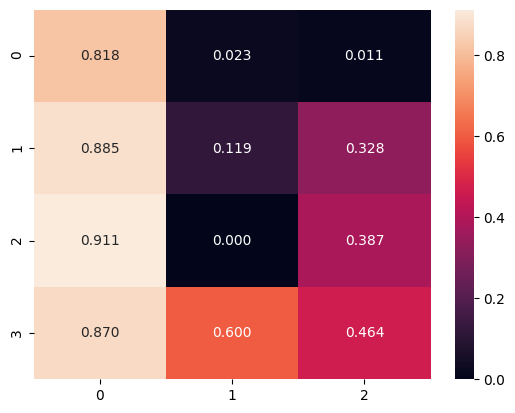

In [42]:

sns.heatmap(pd.DataFrame(ast.literal_eval(dfs_results['results_q_learn_dim_4x3_2023-05-16_03-11-02']['Vtable'].iloc[-1])), annot=True, fmt=".3f")

In [43]:
vtable = pd.DataFrame(ast.literal_eval(dfs_results['results_q_learn_dim_4x3_2023-05-16_03-11-02']['Vtable'].iloc[-1]))

In [64]:
vtable.loc[(0,1)]

0.023070098628985326

In [72]:
# A Python program to print all
# permutations of given length
from itertools import permutations
 
# Get all permutations of length 2
# and length 2
perm = permutations(['up', 'down', 'left', 'right'], 1)

# Print the obtained permutations
for i in list(perm):
    print (i)

('up',)
('down',)
('left',)
('right',)


In [46]:
def play(vtable_matrix):
    start = (0, 0)
    states = []
    action_list = ['up', 'down', 'left', 'right']
    state = start
    
    for action in action_list:
        if action == "up":
            nxtState = (state[0] - 1, state[1])
            reward = vtable.loc[nxtState]
            final_action="up"
        elif action == "down":
            nxtState = (state[0] + 1, state[1])
            if vtable.loc[nxtState]>reward:
                reward = vtable.loc[nxtState]
                final_action="down"
        elif action == "left":
            nxtState = (state[0], state[1] - 1)
            if vtable.loc[nxtState]>reward:
                reward = vtable.loc[nxtState]
                final_action="left"
            reward = vtable.loc[nxtState]
        else:
            nxtState = (state[0], state[1] + 1)
            if vtable.loc[nxtState]>reward:
                reward = vtable.loc[nxtState]
                final_action="right"

        # Se estado é legal, próximo estado, caso contrário, permanece no mesmo
        if (nxtState[0] >= 0) and (nxtState[0] <= (vtable_matrix.shape[0] -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (vtable_matrix[1] -1)):
                return nxtState
        return self.state
    # devolve uma lista com os passos a serem percorridos, dado uma matriz de valor
    # escolhe sempre o maior valor da matriz de valor, que ainda não foi percorrido.
    # Caso todas as adjacencias ja tenham sido percorridas, faz o caminho mais rapido até o local com maior valor
    

In [ ]:
def create_images(matrix, best_way_list):
    # recebe matriz e lista com melhor caminho e salva imagens com cada cenario

In [ ]:
def plot_giff(images_list):
    # recebe lista com imagens e cria giff

#### 3.3. Análise Gráfica do Resultado de Cada Configuração

##### 3.3.1. Resultado matrix_extra_simple (4x3)

In [141]:
df_final_results_4x3 = filter_df(df_final_results, '4x3')

In [142]:
df_final_results_4x3

,FILE NAME,MAX REWARD,LAST REWARD,MAX REWARD TIME,LAST REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps


##### 3.3.2. Resultado matrix_simple (5x5)

In [143]:
df_final_results_5x5 = filter_df(df_final_results, '5x5')

In [151]:
df_final_results_5x5.sort_values(by='LAST REWARD', ascending = False)

,FILE NAME,MAX REWARD,LAST REWARD,MAX REWARD TIME,LAST REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_5x5_2023-04-27_08-40-31,2.571175,2.571175,0.166394,0.233813,13,13,0.7,0.95,0.9,0.013471,0.5,0.01,0.05,100.0,13.0
4,results_q_learn_dim_5x5_2023-04-28_07-43-38,2.571175,2.571175,0.209005,0.480001,13,13,0.8,0.95,0.9,0.010047,1.0,0.01,0.05,200.0,13.0
3,results_q_learn_dim_5x5_2023-04-27_18-42-06,2.617694,2.383123,0.258999,0.265000,15,14,0.7,0.95,0.9,0.010000,1.0,0.01,0.05,10000.0,14.0
6,results_q_learn_dim_5x5_2023-04-28_08-00-35,2.383123,2.383123,0.194000,0.231997,14,14,0.8,0.95,0.9,0.010047,1.0,0.01,0.05,200.0,14.0
1,results_q_learn_dim_5x5_2023-04-27_09-05-49,1.701196,0.614132,0.764841,5.477783,70,277,0.7,0.95,0.9,0.013471,0.5,0.01,0.05,100.0,277.0
2,results_q_learn_dim_5x5_2023-04-27_10-12-21,2.569959,0.586465,0.135031,4.056053,13,301,0.7,0.95,0.9,0.010000,0.7,0.01,0.05,1000.0,301.0
5,results_q_learn_dim_5x5_2023-04-28_07-56-43,2.116934,0.215234,11.137983,4.868670,500,209,0.9,0.95,0.9,0.010047,1.0,0.01,0.05,200.0,209.0


In [156]:
df_final_results_5x5_rounds_200 = df_final_results_5x5[df_final_results_5x5['rounds']==200].sort_values(by='LAST REWARD', ascending = False)

In [234]:
df_final_results_5x5_rounds_200_lr_08 = df_final_results_5x5_rounds_200[df_final_results_5x5_rounds_200['lr']==0.8]
df_final_results_5x5_rounds_200_lr_09 = df_final_results_5x5_rounds_200[df_final_results_5x5_rounds_200['lr']==0.9]

In [198]:
df_final_results_5x5_rounds_100 = df_final_results_5x5[df_final_results_5x5['rounds']==100].sort_values(by='LAST REWARD', ascending = False)

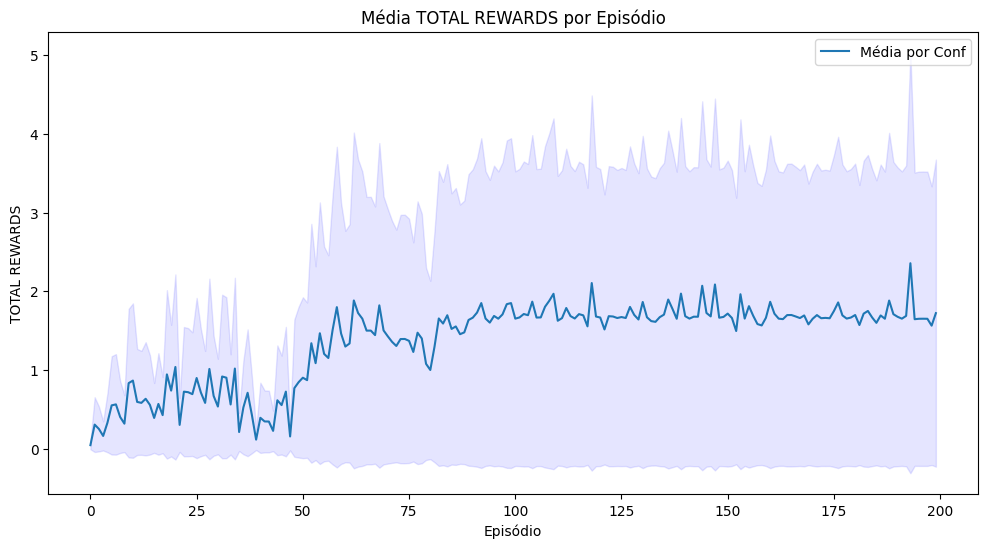

In [194]:
plot_episodes(df_final_results_5x5_rounds_200['FILE NAME'], variable='TOTAL REWARDS')

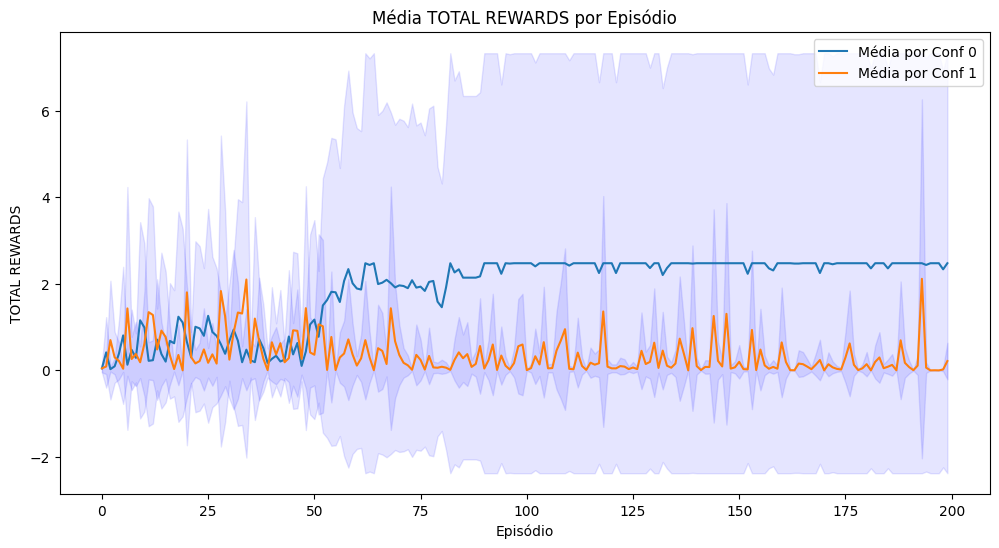

In [239]:
plot_episodes_multi([df_final_results_5x5_rounds_200_lr_08['FILE NAME'],
                     df_final_results_5x5_rounds_200_lr_09['FILE NAME']],
                     variable='TOTAL REWARDS')

In [ ]:
# Iterando por combinações dos parâmetros 20x

matrix_list = [matrix_extra_simple, matrix_simple, matrix_medium] # Ambiente(Matriz) a ser percorrida
lr_list = [0.6, 0.7, 0.8, 0.9] # Learning Rate: Grau de atualização de peso para estado/ação atual
gamma_list = [0.7, 0.8, 0.9, 0.95] # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
d_f_list = [0.8, 0.9, 0.95, 0.99] # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
exp_rate_list = [0.3, 0.5, 0.7, 1] # Exploration rate
min_exp_rate_list = [0.01, 0.2] # Minimum exploration probability 
decay_rate_list = [0.005, 0.01, 0.05, 0.1] # Exponential decay rate for exploration prob
max_steps_list = [200] # Qtd de passos até jogo ser finalizado
rounds_list = [100, 200, 1000, 5000, 10000] # Qtd de jogos

for matrix in matrix_list:
    for lr in lr_list:
        for gamma in gamma_list:
            for d_f in d_f_list:
                for exp_rate in exp_rate_list:
                    for min_exp_rate in min_exp_rate_list:
                        for decay_rate in decay_rate_list:
                            for max_steps in max_steps_list:
                                for rounds in rounds_list:
                                    # PLOTAR GRAFICO REFERENTE A CADA CONFIGURAÇÃO

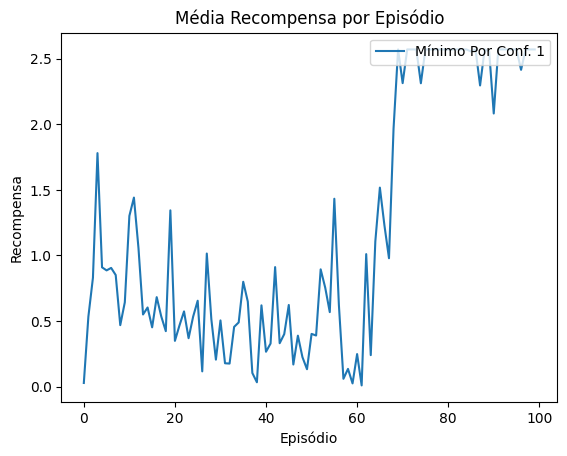

In [155]:
# Cria gráfico com intervalo de confiança para a média dos mínimos
df = dfs_results['results_q_learn_dim_5x5_2023-04-27_08-40-31']
# Estabelece limite inferior e superior
#ci1 = 1.96 * df['TOTAL REWARDS']/np.sqrt(20)

fig, ax = plt.subplots()

fig1 = ax.plot(df['JOGO'],df['TOTAL REWARDS'], label="Mínimo Por Conf. 1")
# fig1 = ax.fill_between(df['JOGO'], (df['TOTAL REWARDS']-ci1), (df['TOTAL REWARDS']+ci1), color='b', alpha=.1)

ax.legend(loc='upper right')

plt.title('Média Recompensa por Episódio')

plt.ylabel('Recompensa')

plt.xlabel('Episódio')

plt.show()

#### 3.3.3. Resultado matrix_medium (8x8)

In [145]:
df_final_results_8x8 = filter_df(df_final_results, '8x8')

In [146]:
df_final_results_8x8

,FILE NAME,MAX REWARD,LAST REWARD,MAX REWARD TIME,LAST REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps


#### 3.3.4. Resultado matrix_complex (13x9)

In [149]:
df_final_results_9x13 = filter_df(df_final_results, '9x13')

In [150]:
df_final_results_9x13

,FILE NAME,MAX REWARD,LAST REWARD,MAX REWARD TIME,LAST REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
7,results_q_learn_dim_9x13_2023-04-28_08-05-11,0.009597,1.024588e-03,4.089003,3.632998,500,500,0.8,0.95,0.900,0.951717,1.0,0.01,0.05,2.0,500.0
8,results_q_learn_dim_9x13_2023-04-28_08-18-28,0.620079,1.457472e-04,7.718930,12.558116,500,500,0.8,0.95,0.900,0.017013,1.0,0.01,0.05,100.0,500.0
9,results_q_learn_dim_9x13_2023-04-28_08-20-45,0.993431,1.039493e-01,8.684000,9.582583,1000,1000,0.8,0.95,0.900,0.820543,1.0,0.01,0.05,5.0,1000.0
10,results_q_learn_dim_9x13_2023-04-28_08-22-26,0.173343,2.142226e-02,13.841992,15.352000,2000,1907,0.8,0.95,0.900,0.820543,1.0,0.01,0.05,5.0,1907.0
11,results_q_learn_dim_9x13_2023-04-28_08-27-17,0.035836,3.583621e-02,50.046057,50.046057,6642,6642,0.8,0.95,0.900,0.820543,1.0,0.01,0.05,5.0,6642.0
12,results_q_learn_dim_9x13_2023-04-28_11-23-04,0.782785,2.800295e-09,62.531928,21.802055,4319,1215,0.8,0.95,0.900,0.010047,1.0,0.01,0.05,200.0,1215.0
13,results_q_learn_dim_9x13_2023-04-28_13-31-51,40.351296,1.299078e+01,16.453002,105.683236,1386,4830,0.8,0.95,0.999,0.017013,1.0,0.01,0.05,100.0,4830.0
14,results_q_learn_dim_9x13_2023-04-29_23-39-21,40.084578,8.183103e+00,8.585000,96.108914,760,5000,0.8,0.95,0.999,0.010000,1.0,0.01,0.05,500.0,5000.0
15,results_q_learn_dim_9x13_2023-05-02_20-09-28,47.100000,3.310000e+01,7.407532,88.053348,901,5000,0.8,0.95,1.000,0.010000,1.0,0.01,0.05,500.0,5000.0
16,results_q_learn_dim_9x13_2023-05-03_08-30-02,4.042473,9.431993e-01,105.109862,103.649143,5000,5000,0.9,0.95,0.950,0.010000,1.0,0.01,0.05,500.0,5000.0
